# Scale Transform Magnitude for rythimic patterns analysis.

This notebook is based on the methodology proposed in:

- _Holzapfel, A., & Stylianou, Y. (2010). Scale transform in rhythmic similarity of music. IEEE transactions on audio, speech, and language processing, 19(1), 176-185._

### Description

The Scale Transform Magnitude (STM) is a descriptor suitable for analyzing rhythmic patterns _without_ relying on beat or downbeat annotations. STM is scale invariant, therefore it is appropriate for comparing pieces with varying tempi.

This notebook serves as a demonstration of the steps involved in computing the STM feature and showcases its application in rhythmic pattern analysis.

### Content

- Load short extract of audio together with its scaled up version
- Compute the onset strenght signal (OSS)
- Compute the autocorrelation of the OSS
- Compute the scale trasnform magnitude (STM)


In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from numpy.linalg import norm

### Load audio file and its scaled version


In [26]:
# path to audio file
audio_file = "clip-MJ_Maraka_1_J1.wav"
# the scaled up version has been obtained using audacity to change the tempo of 15% 
audio_file_scaled = "clip-MJ_Maraka_1_J1-scaled-up.wav"

y, sr = librosa.load(audio_file)
y_scaled, sr = librosa.load(audio_file_scaled)

print("original version")
ipd.display(ipd.Audio(y, rate=sr))

print("15% speeded up version")
ipd.display(ipd.Audio(y_scaled, rate=sr))

original version


15% speeded up version


### Compute Onset Strenght Signal (OSS)


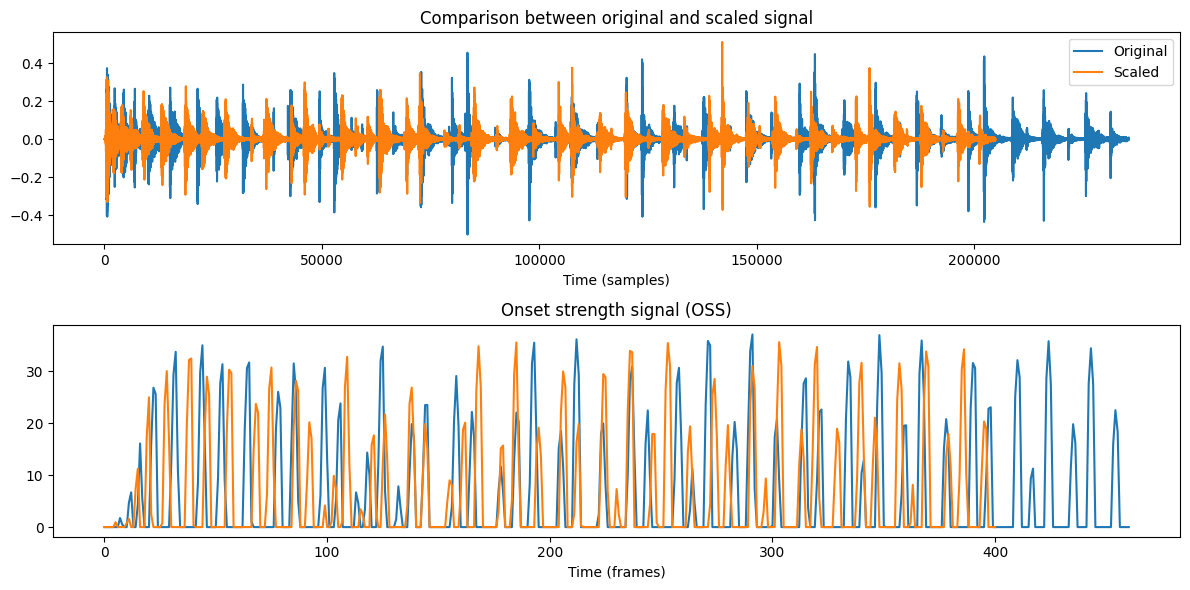

In [22]:
# hop size
H = 512

oss = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median, lag=3, hop_length=H)
oss_scaled = librosa.onset.onset_strength(y=y_scaled, sr=sr, aggregate=np.median, lag=3, hop_length=H)

fig, ax = plt.subplots(nrows=2, figsize=(12, 6))

ax[0].plot(y, label="Original")

ax[0].plot(y_scaled, label="Scaled")

ax[0].set(xlabel="Time (samples)", title="Comparison between original and scaled signal")

ax[0].legend()

ax[1].plot(oss)

ax[1].plot(oss_scaled)

ax[1].set(xlabel="Time (frames)", title="Onset strength signal (OSS)")

plt.tight_layout()

From the graph above, it can be observed that the two signals exhibits a different onset strength signal (OSS). That is because the tempo of the second signal is scaled up by a factor of 15%.

In the following section, we demonstrate the invariance of the Scale Transform Magnitude (STM) to tempo changes. In other words, despite the tempo alteration, the magnitudes of the two signals remain the same.

Before proceeding with the computation of the scale transform, it's necessary to calculate the autocorrelation of the OSS. This step is crucial to overcome the fact that the STM is **not** shift-invariant.

### Compute Autocorrelation & Scale Transform Magnitude


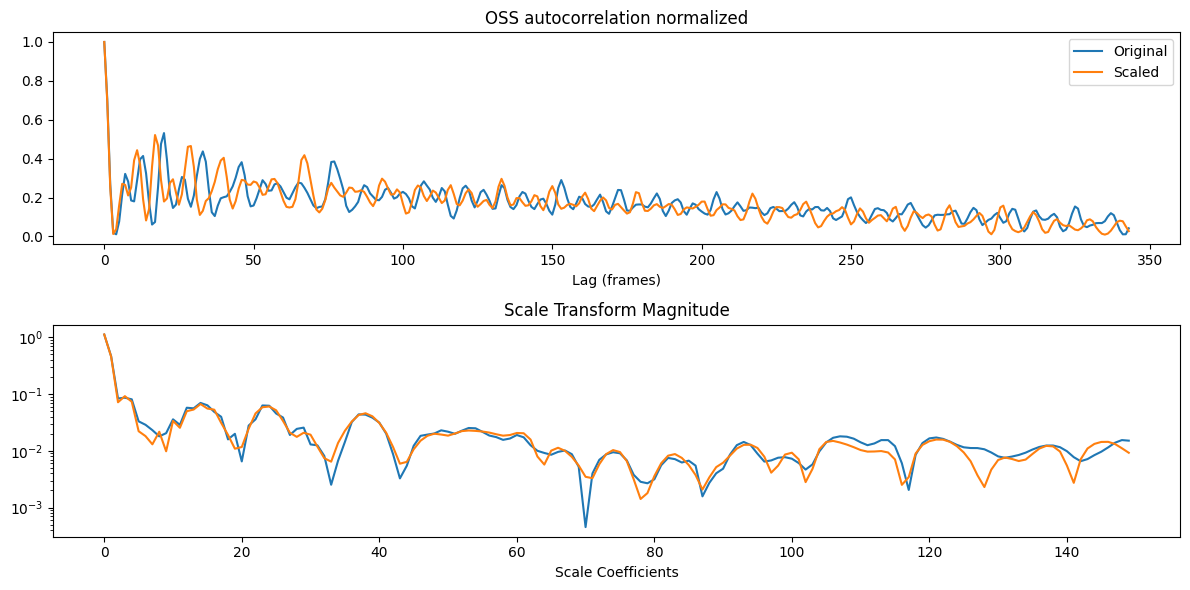

In [23]:
# 8 seconds max lag
oss_ac = librosa.autocorrelate(oss, max_size=8 * sr // H)
oss_ac_scaled = librosa.autocorrelate(oss_scaled, max_size=8 * sr // H)

# Normalization
oss_ac = librosa.util.normalize(oss_ac, norm=np.inf)
oss_ac_scaled = librosa.util.normalize(oss_ac_scaled, norm=np.inf)

# scale transform magnitude
stm = librosa.fmt(librosa.util.normalize(oss_ac))[:150]
stm_scaled = librosa.fmt(librosa.util.normalize(oss_ac_scaled))[:150]

fig, ax = plt.subplots(nrows=2, figsize=(12, 6))

ax[0].plot(oss_ac, label="Original")

ax[0].plot(oss_ac_scaled, label="Scaled")

ax[0].set(xlabel="Lag (frames)", title="OSS autocorrelation normalized")

ax[0].legend()

ax[1].semilogy(np.abs(stm))

ax[1].semilogy(np.abs(stm_scaled))

ax[1].set(xlabel="Scale Coefficients", title="Scale Transform Magnitude")

plt.tight_layout()

Finally, let us compute the similarity between the 2 STMs.

We expect a high similarity score as the STM is supposed to capture rythmic aspects regardless of the tempo variations.


In [24]:
# compute cosine similarity
cosine_sim = np.dot(np.abs(stm), np.abs(stm_scaled)) / (norm(np.abs(stm)) * norm(np.abs(stm_scaled)))
print("Cosine Similarity:", cosine_sim)

Cosine Similarity: 0.9992325847303994
